# Final Project 

Problem : 由番茄外觀預測甜度
---

### Name: 吳灃晉
#### Student ID: 0716116

### Name:席秉萱
#### Student ID:0716001

### Name:林晉德
#### Student ID:609001001

### Name:蔡佳恩
#### Student ID:609001063

### Name:李佳豫
#### Student ID:0617009
---

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib3
import sklearn.preprocessing as preprocess
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer


%matplotlib inline

#### Part 1 : Data Import

---
1. 將資料load 進來，存成Data Frame

2. 把pandas的設定打開，可以跑出所有的行列(For Data Visualization )

---

In [16]:
df = pd.read_csv('ML.csv')  
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

dfremovenum=df.iloc[:,1:]
dfremovenum

,pedicle,black_spot,green_or_yellow,tip,folds,weight,length,width,white,moisture,oil,elasticity,refraction,r,g,b,sweetness
0,0,1.0,1,1,1,16.6,3.8,2.8,3.0,21.0,57.0,41.0,1.3417,99,40,24,6.0
1,0,0.0,0,0,1,7.6,2.5,2.3,3.0,20.0,57.0,41.0,1.3417,104,45,29,6.0
2,0,0.0,1,0,0,6.5,2.1,1.9,5.0,21.0,57.0,41.0,1.3373,131,46,17,3.0
3,1,0.0,1,0,0,11.3,3.1,2.6,3.0,20.0,57.0,41.0,1.3364,118,38,15,2.5
4,1,1.0,0,0,0,9.2,2.7,2.1,5.0,20.0,57.0,41.0,1.3380,102,31,13,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,1,1.0,0,1,1,9.0,3.1,2.1,6.0,20.0,57.0,34.0,1.3395,112,52,28,4.5
464,0,1.0,0,1,0,9.7,3.1,2.1,5.0,20.0,57.0,40.0,1.3410,107,41,19,5.5
465,0,1.0,1,1,1,7.3,2.9,1.8,5.0,23.0,55.0,42.0,1.3417,102,37,19,6.0
466,0,0.0,1,1,0,8.1,2.9,2.1,6.0,20.0,57.0,40.0,1.3395,97,26,8,4.5


In [9]:
imp=SimpleImputer(missing_values=np.nan,strategy='mean', verbose=0, copy=True)
dfmissing=imp.fit_transform(dfremovenum)
#print(dfmissing)
x = dfmissing[:, :-1]
y = dfmissing[:,-1]

In [10]:
xscaled = preprocess.scale(x)
xscaled

array([[-0.93782625,  0.97776156,  1.04816731, ..., -0.99802202,
        -0.28007634,  0.17594907],
       [-0.93782625, -1.02493427, -0.95404616, ..., -0.46628898,
         0.26607252,  0.92182014],
       [-0.93782625, -1.02493427,  1.04816731, ...,  2.40506947,
         0.37530229, -0.86827043],
       ...,
       [-0.93782625,  0.97776156,  1.04816731, ..., -0.6789822 ,
        -0.60776565, -0.569922  ],
       [-0.93782625, -1.02493427,  1.04816731, ..., -1.21071524,
        -1.80929314, -2.21083836],
       [ 1.0662956 ,  0.97776156, -0.95404616, ..., -0.46628898,
        -1.04468474, -1.76331571]])

In [11]:
unique,counts=np.unique(y,return_counts=True)
print(unique,counts)

[2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.  9.5] [ 4  4 17 50 77 92 81 65 32 21 12  6  4  2  1]


酸度0 小於等於4<br>
酸度1 4.5-5.0<br>
酸度2 5.5-6.0<br>
酸度3 6.5-7.0<br>
酸度4 大於等於7.5<br>

In [12]:
yflevel=np.array([], dtype=int)
for i in y:
    if i <= 4.2:
        yflevel = np.append(yflevel, 0)
    elif i<=5.2:
        yflevel = np.append(yflevel, 1)
    elif i<=6.2:
        yflevel = np.append(yflevel, 2)
    elif i<=7.2:
        yflevel = np.append(yflevel, 3)
    else:
        yflevel = np.append(yflevel, 4)
#print(yflevel)

#### Part 2 : Show Data Distribution with Data Visualization

---
1. 先繪出每個feature的數值分布

2. 再依照甜度等級，繪出每個feature的數值分布

---
#### 每個feature中的數值分布:

D:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


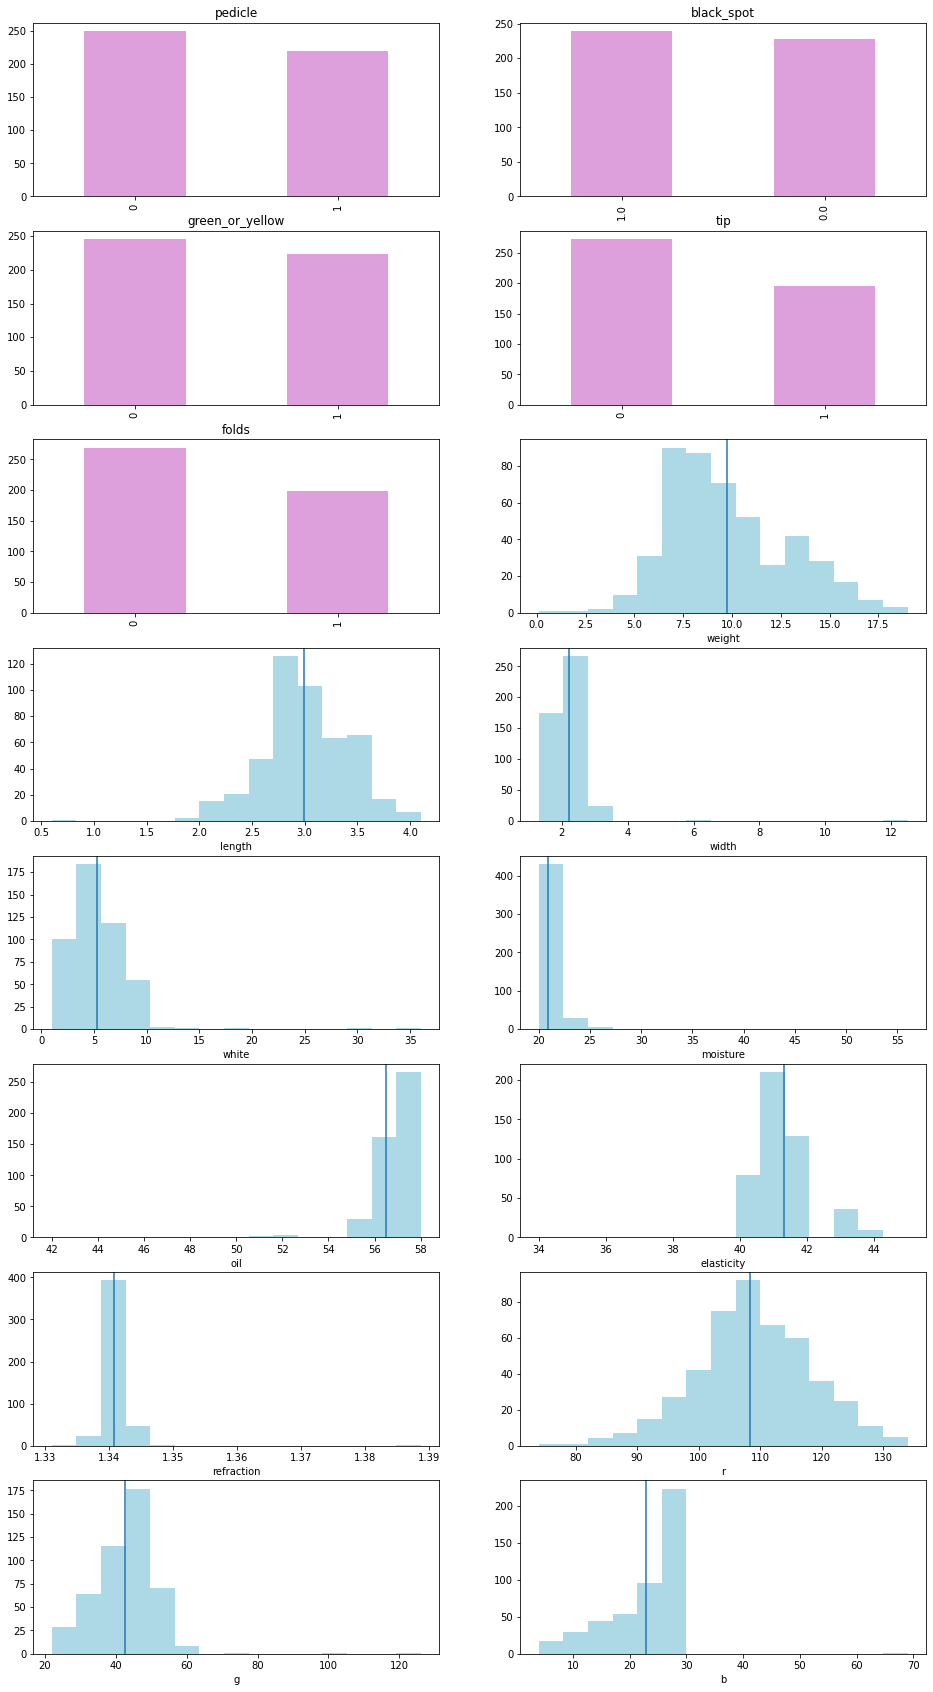

In [34]:
plt.figure(figsize=(16,30))
plt.subplot(8,2,1)
dfremovenum['pedicle'].value_counts().plot.bar(color='plum', title="pedicle")
plt.subplot(8,2,2)
dfremovenum['black_spot'].value_counts().plot.bar(color='plum', title="black_spot")
plt.subplot(8,2,3)
dfremovenum['green_or_yellow'].value_counts().plot.bar(color='plum', title="green_or_yellow")
plt.subplot(8,2,4)
dfremovenum['tip'].value_counts().plot.bar(color='plum', title="tip")
plt.subplot(8,2,5)
dfremovenum['folds'].value_counts().plot.bar(color='plum', title="folds")

plt.subplot(8,2,6)
plt.hist(dfremovenum['weight'], bins=15, color='lightblue')
plt.xlabel('weight')
plt.axvline(x=dfremovenum['weight'].mean())

plt.subplot(8,2,7)
plt.hist(dfremovenum['length'], bins=15, color='lightblue')
plt.xlabel('length')
plt.axvline(x=dfremovenum['length'].mean())

plt.subplot(8,2,8) 
plt.hist(dfremovenum['width'], bins=15, color='lightblue')
plt.xlabel('width')
plt.axvline(x=dfremovenum['width'].mean())

plt.subplot(8,2,9) 
plt.hist(dfremovenum['white'], bins=15, color='lightblue')
plt.xlabel('white')
plt.axvline(x=dfremovenum['white'].mean())

plt.subplot(8,2,10) 
plt.hist(dfremovenum['moisture'], bins=15, color='lightblue')
plt.xlabel('moisture')
plt.axvline(x=dfremovenum['moisture'].mean())

plt.subplot(8,2,11) 
plt.hist(dfremovenum['oil'], bins=15, color='lightblue')
plt.xlabel('oil')
plt.axvline(x=dfremovenum['oil'].mean())

plt.subplot(8,2,12) 
plt.hist(dfremovenum['elasticity'], bins=15, color='lightblue')
plt.xlabel('elasticity')
plt.axvline(x=dfremovenum['elasticity'].mean())

plt.subplot(8,2,13) 
plt.hist(dfremovenum['refraction'], bins=15, color='lightblue')
plt.xlabel('refraction')
plt.axvline(x=dfremovenum['refraction'].mean())

plt.subplot(8,2,14) 
plt.hist(dfremovenum['r'], bins=15, color='lightblue')
plt.xlabel('r')
plt.axvline(x=dfremovenum['r'].mean())

plt.subplot(8,2,15) 
plt.hist(dfremovenum['g'], bins=15, color='lightblue')
plt.xlabel('g')
plt.axvline(x=dfremovenum['g'].mean())

plt.subplot(8,2,16) 
plt.hist(dfremovenum['b'], bins=15, color='lightblue')
plt.xlabel('b')
plt.axvline(x=dfremovenum['b'].mean())

#### 依據不同的甜度等級來看數值分布:
##### 先把dataframe改成方便繪圖的樣子

In [73]:
df = dfremovenum.drop(['sweetness'], axis=1)
df['sweetness']=yflevel

##### 作圖:先畫類型是非數值的feature

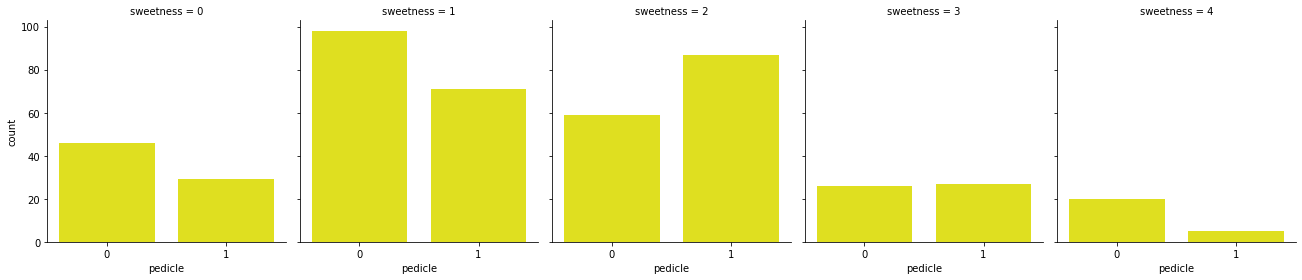

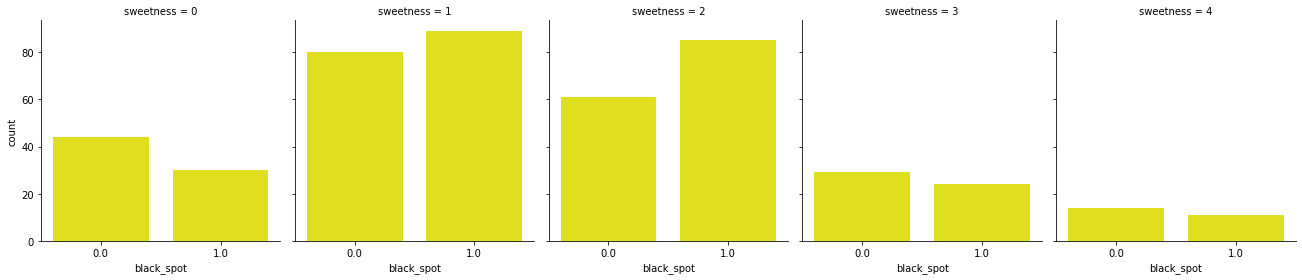

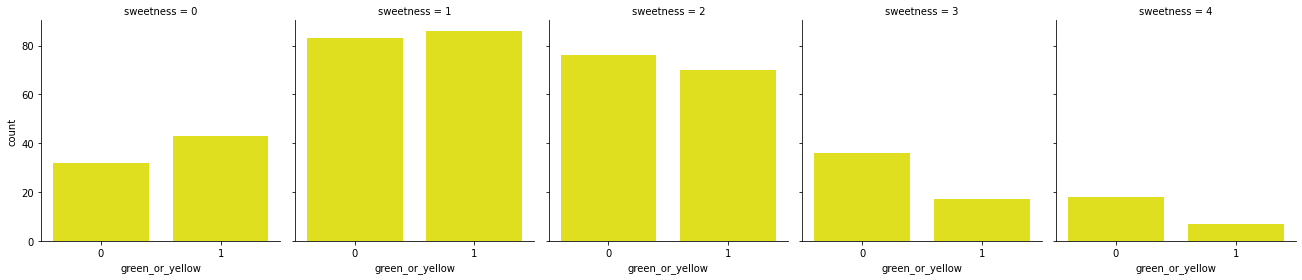

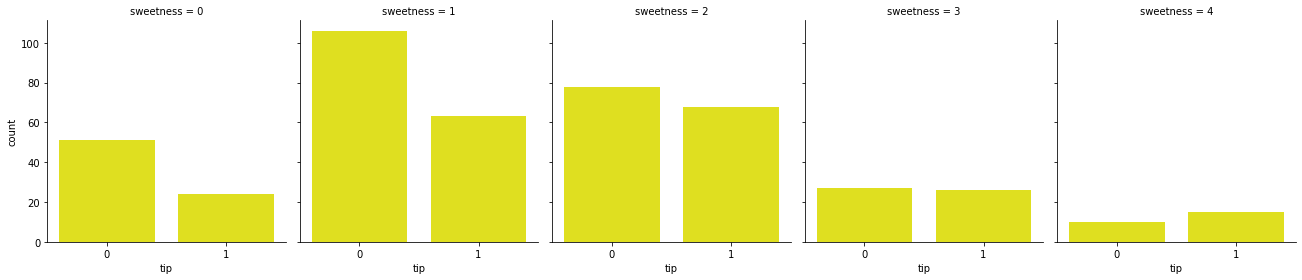

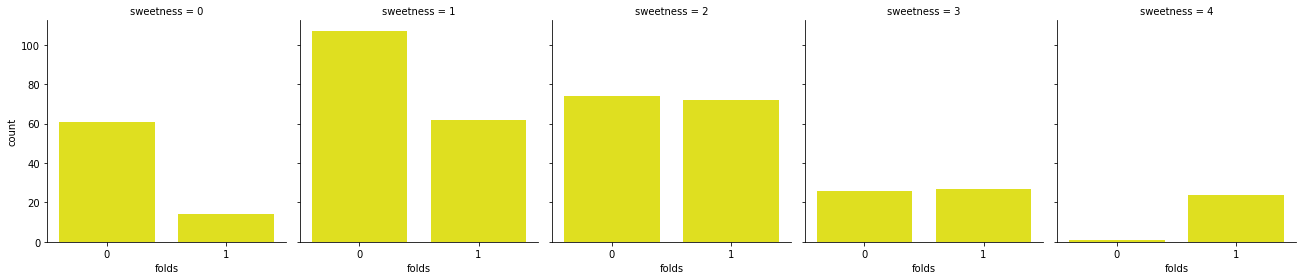

In [65]:
sns.catplot(x='pedicle', data=df, col='sweetness', kind='count', color='yellow', height=4, aspect=.9)
sns.catplot(x='black_spot', data=df, col='sweetness', kind='count', color='yellow', height=4, aspect=.9)
sns.catplot(x='green_or_yellow', data=df, col='sweetness', kind='count', color='yellow', height=4, aspect=.9)
sns.catplot(x='tip', data=df, col='sweetness', kind='count', color='yellow', height=4, aspect=.9)
sns.catplot(x='folds', data=df, col='sweetness', kind='count', color='yellow', height=4, aspect=.9)

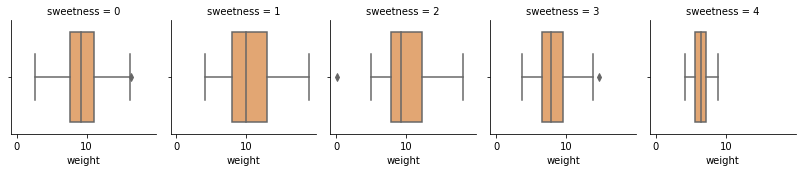

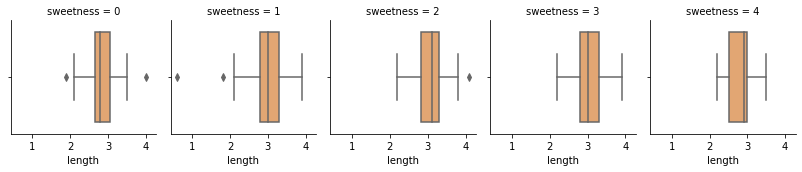

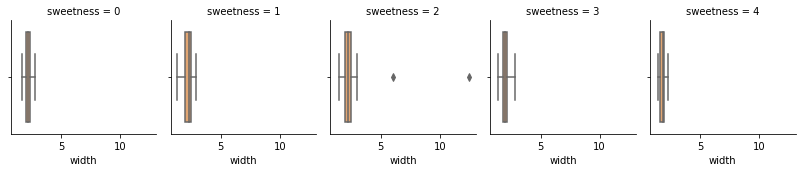

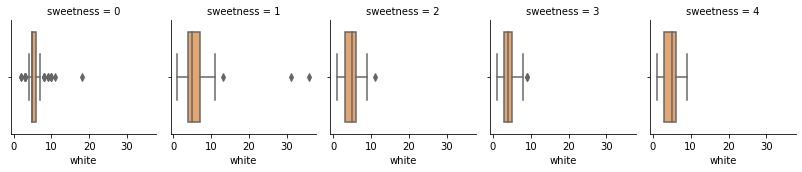

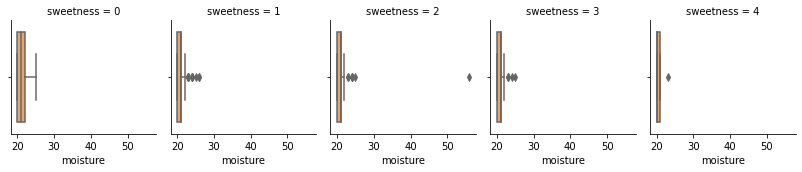

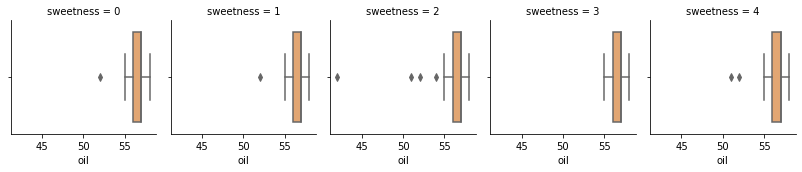

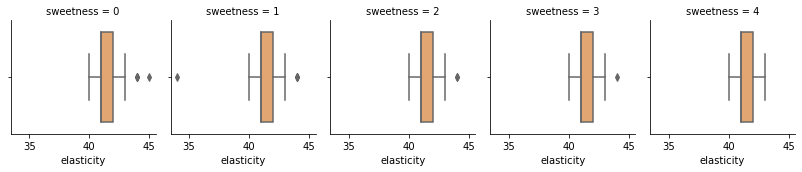

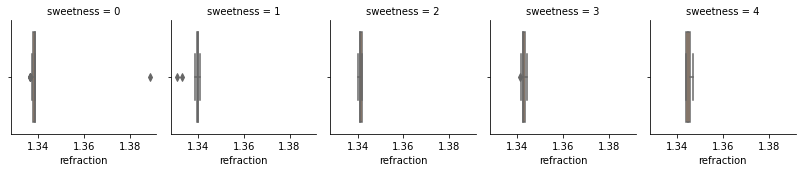

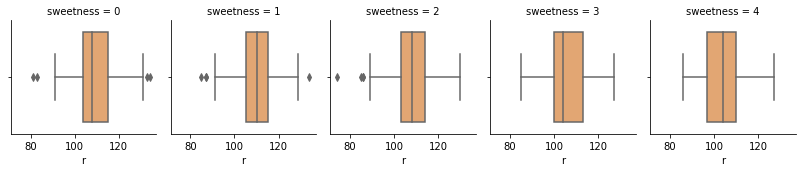

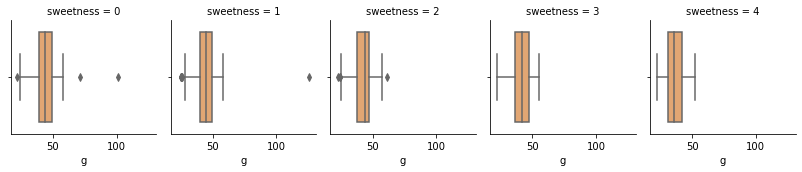

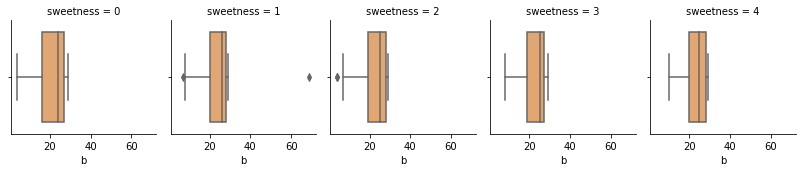

In [72]:
sns.catplot(x='weight', data=df, col='sweetness', kind='box', color='sandybrown', height=2.5, aspect=.9)
sns.catplot(x='length', data=df, col='sweetness', kind='box', color='sandybrown', height=2.5, aspect=.9)
sns.catplot(x='width', data=df, col='sweetness', kind='box', color='sandybrown', height=2.5, aspect=.9)
sns.catplot(x='white', data=df, col='sweetness', kind='box', color='sandybrown', height=2.5, aspect=.9)
sns.catplot(x='moisture', data=df, col='sweetness', kind='box', color='sandybrown', height=2.5, aspect=.9)
sns.catplot(x='oil', data=df, col='sweetness', kind='box', color='sandybrown', height=2.5, aspect=.9)
sns.catplot(x='elasticity', data=df, col='sweetness', kind='box', color='sandybrown', height=2.5, aspect=.9)
sns.catplot(x='refraction', data=df, col='sweetness', kind='box', color='sandybrown', height=2.5, aspect=.9)
sns.catplot(x='r', data=df, col='sweetness', kind='box', color='sandybrown', height=2.5, aspect=.9)
sns.catplot(x='g', data=df, col='sweetness', kind='box', color='sandybrown', height=2.5, aspect=.9)
sns.catplot(x='b', data=df, col='sweetness', kind='box', color='sandybrown', height=2.5, aspect=.9)